In [ ]:
#all the necessary imports
from google.colab import drive
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import math
import matplotlib.pyplot as fig_plot_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.utils import np_utils

In [ ]:
# mounting the drive
drive .mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the dataset from the drive
datasetLoadFile = pd.read_csv('drive/MyDrive/Dataset/fer2013.csv')
print(datasetLoadFile.shape)
datasetLoadFile.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
#array of all the unique emotional label in the dataset
datasetLoadFile.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
#displays the information of the dataset
datasetLoadFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
#assigning the emotional values to text value
emotionToTextFromLabel = {0 :'anger', 1 :'disgust', 2 :'fear', 3 :'happiness', 4 :'sadness', 5 :'surprise', 6 :'neutral'}

In [ ]:
#count of pictures per emotions
datasetLoadFile.emotion.value_counts().sort_values(ascending=True).rename(index=emotionToTextFromLabel)

,count
emotion,
disgust,547
surprise,4002
anger,4953
fear,5121
sadness,6077
neutral,6198
happiness,8989


The happiness emotion has the highest number of samples and the disgust emotions seems to have the lowest amount.

<Axes: >

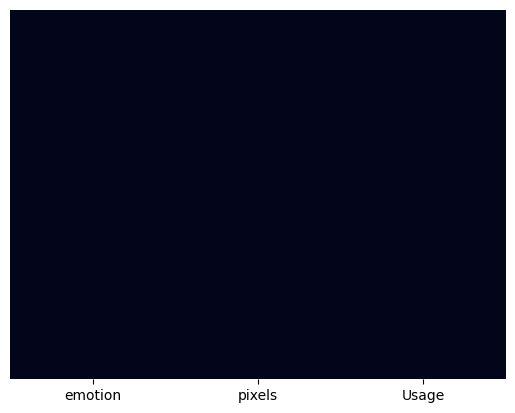

In [ ]:
#heatmap to check for null data in the dataset
sns.heatmap(datasetLoadFile.isnull(),yticklabels=False, cbar =False)

/tmp/ipython-input-433716781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='emotion',data =datasetLoadFile ,palette ='Set3')


([<matplotlib.axis.XTick at 0x79b23a636ae0>,
 [Text(0, 0, 'anger'),
  Text(1, 0, 'disgust'),
  Text(2, 0, 'fear'),
  Text(3, 0, 'happiness'),
  Text(4, 0, 'sadness'),
  Text(5, 0, 'surprise'),
  Text(6, 0, 'neutral')])

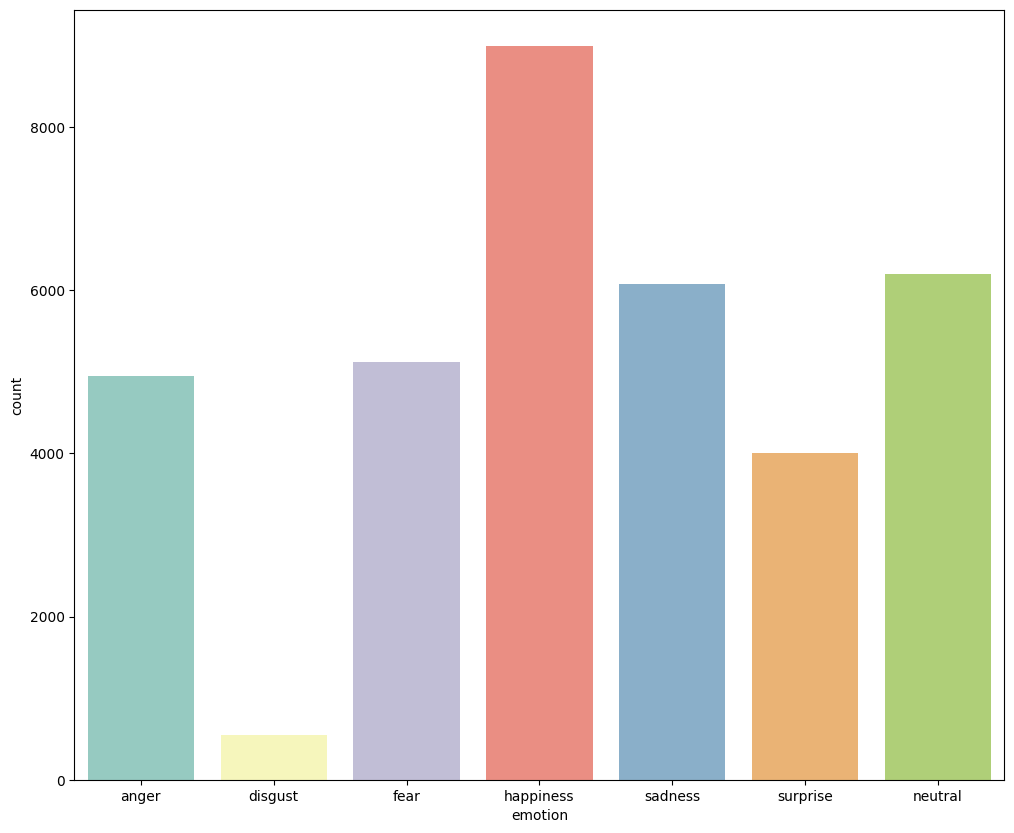

In [ ]:
#bar graph representing the emotions
fig_plot_data.figure (figsize =(12 ,10 ))
sns.countplot(x ='emotion',data =datasetLoadFile ,palette ='Set3')
fig_plot_data.xticks(list(emotionToTextFromLabel.keys()),list(emotionToTextFromLabel.values()))

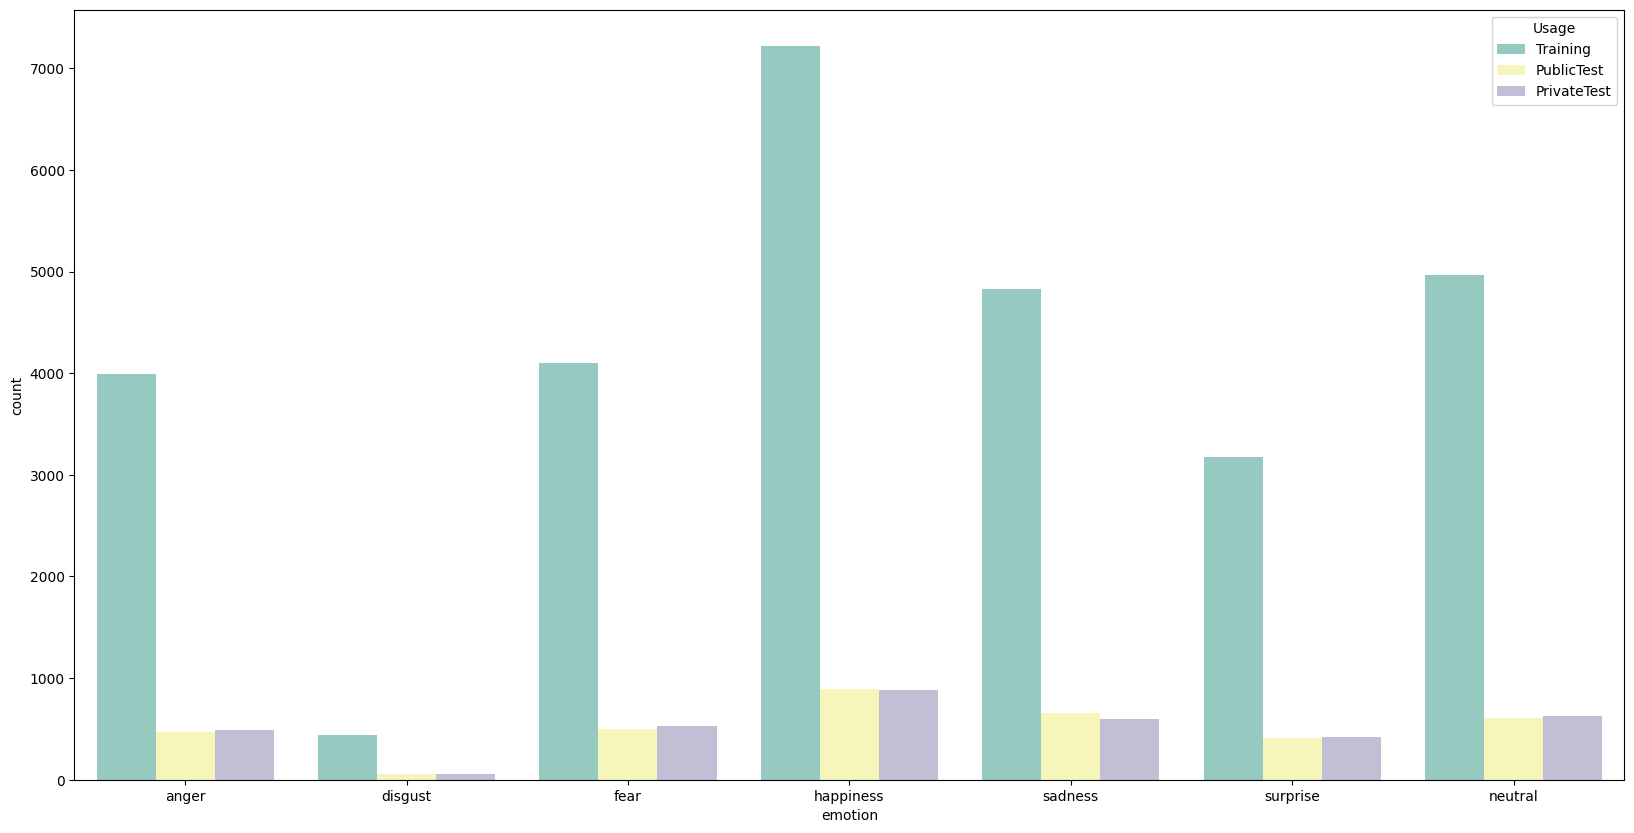

In [ ]:
#bar graph to represent emotions that are present in the dataset seperated as different data usage
fig_plot_data.figure(figsize=(20,10))

sns.countplot(x="emotion", hue="Usage", data=datasetLoadFile, palette='Set3')
fig_plot_data.xticks(list(emotionToTextFromLabel.keys()), list(emotionToTextFromLabel.values()))
fig_plot_data.show()

`The happy emotion has the most number of data followed by neutral, sad, fear, anger, surprise and disgust`


In [ ]:
#the number of pixels of images in both directions
math.sqrt(len(datasetLoadFile.pixels[0].split(' ')))

48.0

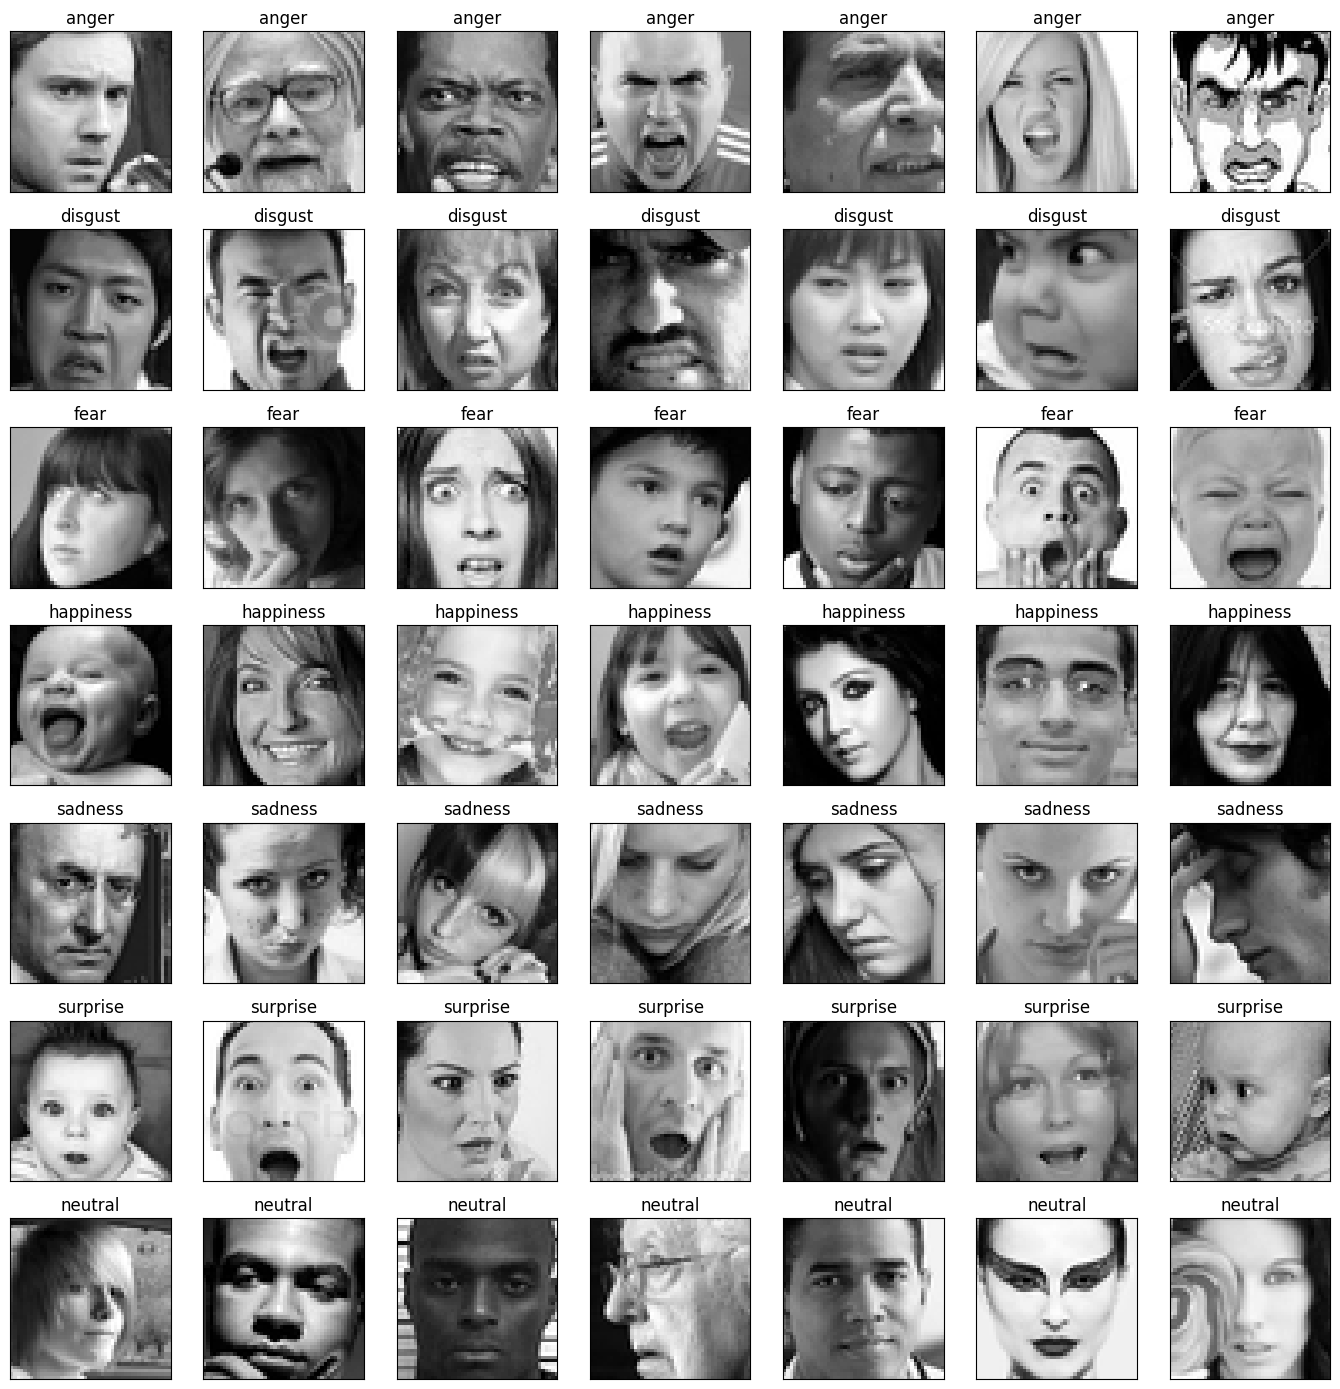

In [ ]:
#display unique emotions and pictures in different rows
figures = fig_plot_data.figure(1,(14,14))

count_values = 0
for label_values in sorted(datasetLoadFile.emotion.unique()):
    for j in range (7):
        pixelValues = datasetLoadFile[datasetLoadFile.emotion == label_values].pixels.iloc[count_values]
        pixelValues = np.array(pixelValues.split(' ')).reshape(48,48).astype('float32')
        count_values +=1
        axis_values = fig_plot_data.subplot(7, 7, count_values)
        axis_values.imshow(pixelValues, cmap ='gray')
        axis_values.set_xticks([])
        axis_values.set_yticks([])
        axis_values.set_title(emotionToTextFromLabel[label_values])
        fig_plot_data.tight_layout()

In [ ]:

labelsOfIntrest = [0 ,1 ,2 ,3 ,4 ,5 ,6]

In [ ]:
#displays the number of data in the dataset based on the emotion label
datasetLoadFile = datasetLoadFile[datasetLoadFile.emotion.isin(labelsOfIntrest)]
datasetLoadFile.shape

(35887, 3)

In [ ]:
#it is used to reshape the umages to the size of 48x48 to be fed into the neural network to be trained
array_of_image = datasetLoadFile.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
array_of_image = np.stack(array_of_image ,axis = 0)

In [ ]:
#the shape of the array after the images have been resized
array_of_image.shape

(35887, 48, 48, 1)

In [ ]:

label_encoder = LabelEncoder()
label_of_image = label_encoder.fit_transform(datasetLoadFile.emotion)
label_of_image = np_utils.to_categorical(label_of_image)
label_of_image.shape

(35887, 7)

In [ ]:

label_encoder_mapping_name = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encoder_mapping_name)

{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6)}


`The data is now going to be split into traning and testing data.`


In [ ]:
#splitting the dataset into test and train
trainX, validX, trainY, validY = train_test_split(
                                                  array_of_image,
                                                  label_of_image,
                                                  shuffle =True,
                                                  stratify =label_of_image,
                                                  test_size =0.1,
                                                  random_state =42
                                                )
trainX.shape, validX.shape, trainY.shape, validY.shape

((32298, 48, 48, 1), (3589, 48, 48, 1), (32298, 7), (3589, 7))

In [ ]:

del datasetLoadFile
del array_of_image
del label_of_image

In [ ]:
# Dimensions of the trainingimages
width_of_image = trainX.shape[1]
height_of_image =trainX.shape[2]
depth_of_image =trainX.shape[3]
number_of_totalClasses =trainY.shape[1]

In [ ]:
#normalizing the data to be fed into the model
trainX =trainX /255.
validX =validX /255.

`Building of the model with the layers specified in CNN`

In [ ]:
#Model Architecture Definition
def build_neural_network (optimizer ):
    name_of_network =Sequential (name ='DCNN')
    #first block
    name_of_network .add (
    Conv2D (
    filters=64 ,
    kernel_size=(5,5),
    input_shape=(width_of_image ,height_of_image ,depth_of_image ),
    activation='elu',
    padding='same',
    kernel_initializer='he_normal',
    name='conv2d_1'
    )
    )
    name_of_network .add (BatchNormalization (name ='batchnorm_1'))
    name_of_network .add (
    Conv2D (
    filters=64,
    kernel_size=(5,5),
    activation='elu',
    padding='same',
    kernel_initializer='he_normal',
    name='conv2d_2'
    )
    )
    name_of_network.add(BatchNormalization(name='batchnorm_2'))
    name_of_network.add(MaxPooling2D(pool_size =(2,2 ),name ='maxpool2d_1'))
    name_of_network.add(Dropout(0.4,name ='dropout_1'))
    #second block
    name_of_network.add (
    Conv2D (
    filters=128 ,
    kernel_size=(3,3),
    activation='elu',
    padding='same',
    kernel_initializer='he_normal',
    name='conv2d_3'
    )
    )
    name_of_network.add(BatchNormalization(name='batchnorm_3'))
    name_of_network.add(
    Conv2D (
    filters=128 ,
    kernel_size =(3,3),
    activation='elu',
    padding='same',
    kernel_initializer='he_normal',
    name='conv2d_4'
    )
    )
    name_of_network.add(BatchNormalization(name ='batchnorm_4'))

    name_of_network.add (MaxPooling2D (pool_size=(2,2),name='maxpool2d_2'))
    name_of_network.add (Dropout (0.4,name='dropout_2'))
    #third block
    name_of_network.add (
    Conv2D (
    filters =256 ,
    kernel_size=(3,3),
    activation='elu',
    padding='same',
    kernel_initializer='he_normal',
    name='conv2d_5'
    )
    )
    name_of_network.add(BatchNormalization(name='batchnorm_5'))

    name_of_network.add(
    Conv2D (
    filters=256 ,
    kernel_size=(3,3),
    activation='elu',
    padding='same',
    kernel_initializer='he_normal',
    name='conv2d_6'
    )
    )
    name_of_network.add(BatchNormalization(name='batchnorm_6'))
    name_of_network .add (MaxPooling2D(pool_size=(2,2),name='maxpool2d_3'))
    name_of_network .add (Dropout (0.5 ,name ='dropout_3'))

    #fourth block
    name_of_network .add (Flatten (name ='flatten'))

    name_of_network .add (
    Dense (
    128 ,
    activation ='elu',
    kernel_initializer ='he_normal',
    name ='dense_1'
    )
    )
    name_of_network .add (BatchNormalization (name ='batchnorm_7'))
    name_of_network .add (Dropout (0.6 ,name ='dropout_4'))

    #fifth block
    name_of_network .add (
    Dense (
    number_of_totalClasses ,
    activation ='softmax',
    name ='out_layer'
    )
    )

    name_of_network .compile (
    loss ='categorical_crossentropy',
    optimizer =optimizer ,
    metrics =['accuracy']
    )

    name_of_network .summary ()

    return name_of_network

In [ ]:
#defining the callbacks
"""
The use of early stopping and the learning rate scheleduler has been used to avoid the overfitting of the data
"""

stop_at_early =EarlyStopping (
monitor ='val_accuracy',
min_delta =0.00005 ,
patience =10 ,
verbose =1 ,
restore_best_weights =True ,
)

scheduler_of_learning_rate =ReduceLROnPlateau (
monitor ='val_accuracy',
factor =0.5 ,
patience =5 ,
min_lr =1e-7 ,
verbose =1 ,
)


callbacks =[
stop_at_early ,
scheduler_of_learning_rate ,
]

In [ ]:
# Data Augmentation to increase the size of the training data
training_of_data_generated =ImageDataGenerator(
                                              rotation_range = 15,
                                              width_shift_range = 0.15,
                                              height_shift_range = 0.15,
                                              shear_range = 0.15,
                                              zoom_range = 0.15,
                                              horizontal_flip = True
                                              )
training_of_data_generated.fit(trainX)

In [ ]:
# Model training
size_of_batch = 32
number_of_epochs = 100
optimizer = [optimizers.Adam(0.001)]
model = build_neural_network(optimizer[0])
history = model.fit(
                   training_of_data_generated.flow(trainX, trainY, batch_size = size_of_batch),
                   validation_data = (validX, validY),
                   epochs = number_of_epochs,
                   callbacks = callbacks
                   )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_2                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_3                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_4                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_5                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_6                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_3 (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_7                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,395,591 (9.14 MB)

 Trainable params: 2,393,543 (9.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1010/1010 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.2118 - loss: 2.2821 - val_accuracy: 0.3566 - val_loss: 1.6325 - learning_rate: 0.0010
Epoch 2/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.3290 - loss: 1.6859 - val_accuracy: 0.4578 - val_loss: 1.4513 - learning_rate: 0.0010
Epoch 3/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.4237 - loss: 1.4928 - val_accuracy: 0.5127 - val_loss: 1.2933 - learning_rate: 0.0010
Epoch 4/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.4714 - loss: 1.3985 - val_accuracy: 0.5288 - val_loss: 1.2713 - learning_rate: 0.0010
Epoch 5/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.4917 - loss: 1.3384 - val_accuracy: 0.5528 - val_loss: 1.1683 - learning_rate: 0.0010
Epoch 6/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.5133 - loss: 1.2917 - val_accuracy: 0.5472 - val_loss: 1.1629 - learning_rate: 0.0010
Epoch 7/100
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0

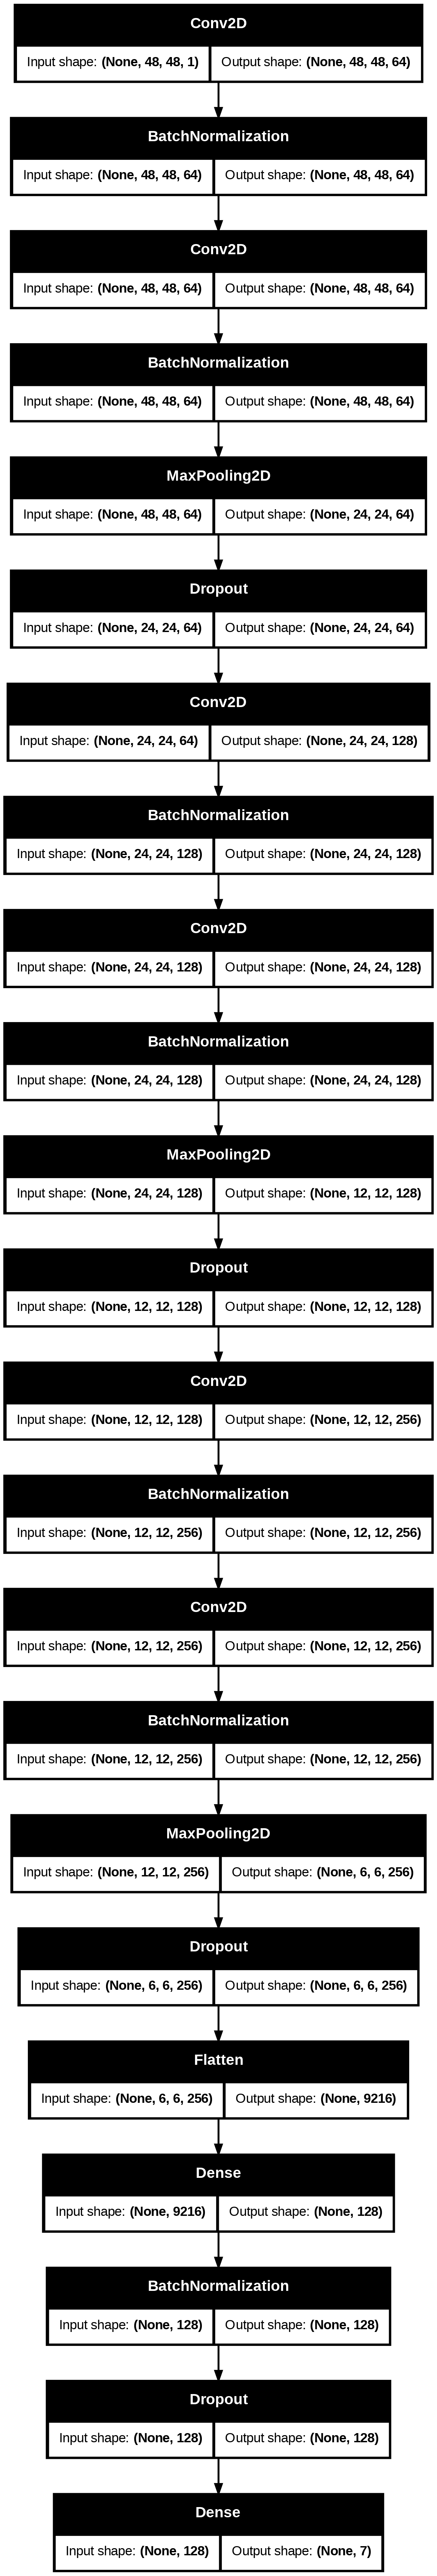

In [ ]:
# Model visualization
plot_model(model, show_shapes = True)

In [ ]:
# save model to file
model_in_json = model.to_json()
with open("modelofEmotionDetectionIndStudy.json","w") as json_file:
    json_file.write(model_in_json)
model.save("modelofEmotionDetectionIndStudy.h5")

`The model is saved`

    The history of number of epochs represent that the accuracy has increased gradully and has achived an accuracy of 69% and then the model starts to overfit the training data

/tmp/ipython-input-4213438671.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "variable", y = "value", data = acc_df, ax = axes[0], palette = "Set3")
/tmp/ipython-input-4213438671.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "variable", y = "value", data = loss_df, ax = axes[1], palette = "Set3")


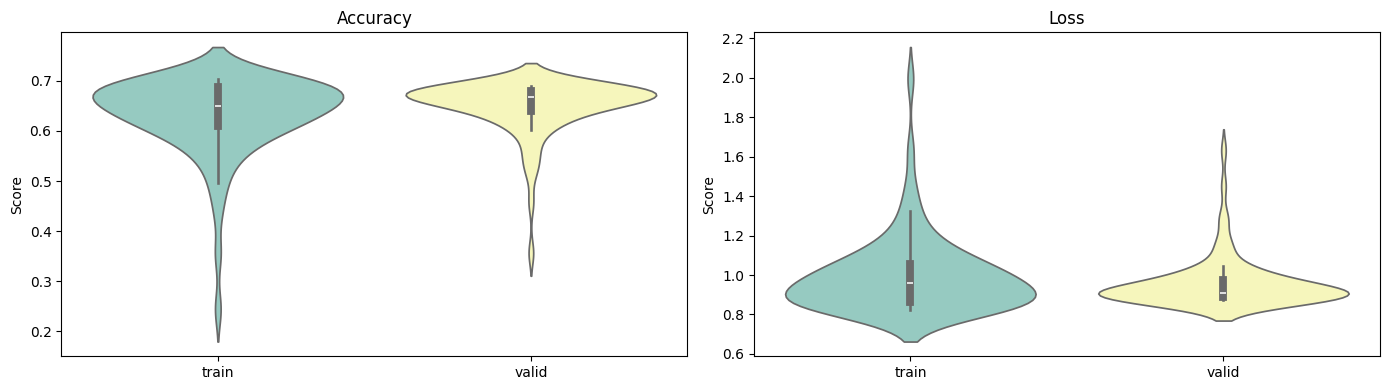

In [ ]:
# Performance graph of the model
acc_df = pd.melt(pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']}))
loss_df = pd.melt(pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']}))
fig, axes = fig_plot_data.subplots (1, 2, figsize = (14, 4))
sns.violinplot(x = "variable", y = "value", data = acc_df, ax = axes[0], palette = "Set3")
axes[0].set_title("Accuracy")
axes[0].set_xlabel("")
axes[0].set_ylabel("Score")
sns.violinplot(x = "variable", y = "value", data = loss_df, ax = axes[1], palette = "Set3")
axes[1].set_title("Loss")
axes[1].set_xlabel("")
axes[1].set_ylabel("Score")
fig.tight_layout()
fig.savefig("performance_graph.png", dpi = 200)
fig_plot_data.show()

In [ ]:
#confusion matrix to display the model's accuracy for test data
y_test_arg = np.argmax(validY, axis = 1)
Y_pred = np.argmax(model.predict(validX), axis = 1)
print('Confusion Matrix')
confusion_matrix_validation_test = confusion_matrix(y_test_arg, Y_pred)
print(confusion_matrix_validation_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Confusion Matrix
[[342   6  25  15  47  13  47]
 [ 14  28   7   1   2   1   2]
 [ 91   1 220  16  97  45  42]
 [ 13   1  15 795  14  18  43]
 [ 64   2  50  18 333   7 134]
 [ 15   0  46  29   0 305   5]
 [ 41   1  18  32  68   8 452]]


## Testing portion

In [ ]:
#all the emotions in the dataset
every_expression = ["angry","disgust","scared","happy","sad","surprised","neutral"]

In [ ]:
#model prediction of validity data
prediction_ofEmotion = model.predict(validX).argmax(axis = 1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
#creating of testing function to compare the model's prediction against the actual prediction
def testingFunction(row_of_image_pixels):
  img =validX[row_of_image_pixels].reshape(48, 48)
  fig_plot_data.imshow(img, cmap =fig_plot_data.cm.gray)
  print("The actual output is--->", every_expression[y_test_arg[row_of_image_pixels]])
  print("The predition of the image is---> ", every_expression[prediction_ofEmotion[row_of_image_pixels]])

The actual output is---> neutral
The predition of the image is--->  neutral


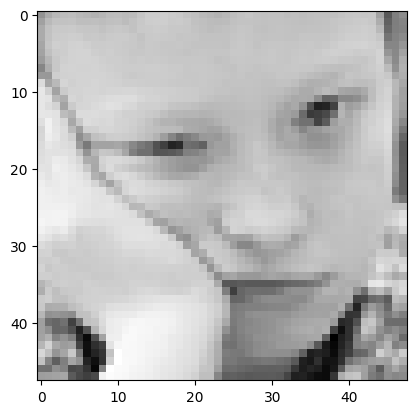

In [ ]:

testingFunction(123)

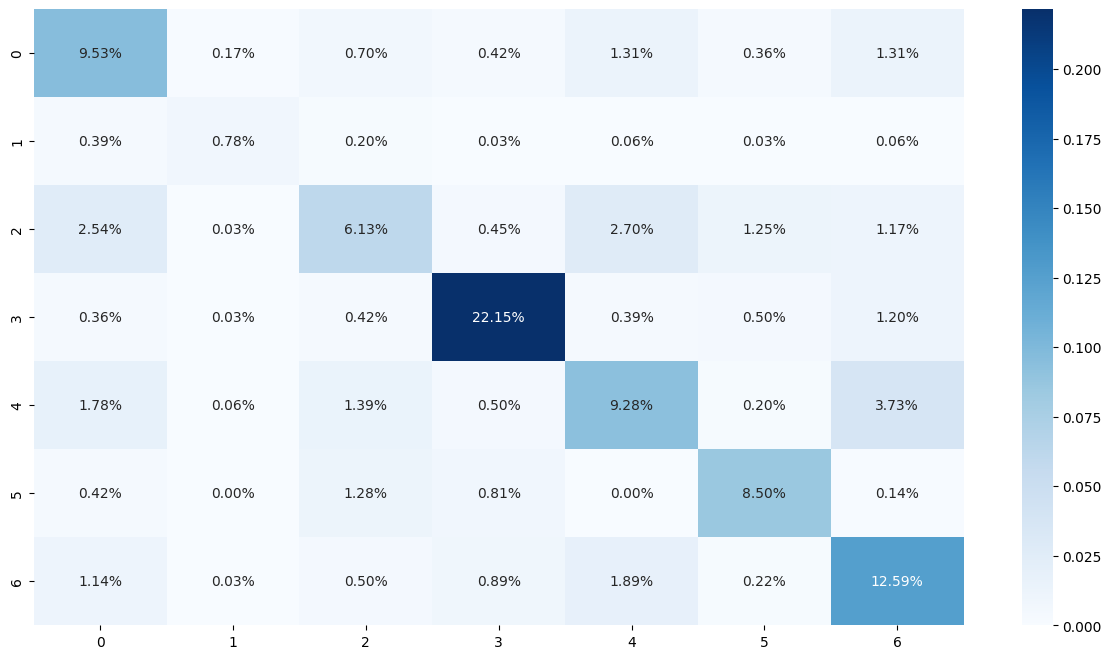

In [ ]:
#confusion matrix for validation dataset
figure_plotter = fig_plot_data.figure(figsize = (15, 8))
sns.heatmap(confusion_matrix_validation_test/np.sum(confusion_matrix_validation_test), cmap = 'Blues', annot = True, fmt = '0.2%')
figure_plotter.savefig('confustion_matrix_of_validation_data.png')

The confusion matrix clearly reveals that our model performs well in the class 'happy,' but not so well in the "disgust" class.The happy emotion has the highest number of data and the "disgust" class doesn't perform well because it has a lower number of training data